# Data Science in Psychology & Neuroscience (DSPN): 

## Lecture 19. Some Advanced Data Modeling Stuff.

### Date: November 9, 2023

### To-Dos From Last Class:

* Assignment #5
    
### Today:

* Robust variants of GLM tests
* Linear Mixed-Effects Models
    * AKA multi-level models, mixed models, random effect models, etc.

### Homework

* Assignment #5

In [1]:
# plot theme stuff
# Many palettes available online, can customize
# these are from: https://colorbrewer2.org/#type=qualitative&scheme=Set1&n=9
my_palette <- c("#e41a1c","#377eb8","#4daf4a","#984ea3","#ff7f00")

# This is the basic function I use for all the ggplots I create. 
# Modified from this black themed ggplot function: https://gist.github.com/jslefche/eff85ef06b4705e6efbc
my_theme = function(base_size = 24, base_family = "") {
  
  theme_grey(base_size = base_size, base_family = base_family) %+replace%
    
    theme(
      # Specify axis options
      axis.line = element_blank(),  
      axis.text.x = element_text(size = base_size*0.8, color = "black", lineheight = 0.9),  
      axis.text.y = element_text(size = base_size*0.8, color = "black", lineheight = 0.9),  
      axis.ticks = element_line(color = "black", size  =  0.2),
      axis.title.x = element_text(size = base_size, color = "black", margin = margin(10, 0, 0, 0)),
      axis.title.y = element_text(size = base_size, color = "black", angle = 90, margin = margin(0, 10, 0, 0)),  
      axis.ticks.length = unit(0.3, "lines"),   
      # Specify legend options
      legend.background = element_rect(color = NA, fill = "#ffffff"),  
      legend.key = element_rect(color = "black",  fill = "#ffffff"),  
      legend.key.size = unit(2, "lines"),  
      legend.key.height = NULL,  
      legend.key.width = NULL,      
      legend.text = element_text(size = base_size*0.8, color = "black"),  
      legend.title = element_text(size = base_size*0.8, face = "bold", hjust = 0, color = "black"),
      legend.position = "right",  
      legend.text.align = NULL,  
      legend.title.align = NULL,  
      legend.direction = "vertical",  
      legend.box = NULL, 
      # Specify panel options
      panel.background = element_rect(fill = "#ffffff", color  =  NA),  
      panel.border = element_rect(fill = NA, color = "black"),  
      panel.grid.major = element_line(color = "#ffffff"),  
      panel.grid.minor = element_line(color = "#ffffff"),  
      panel.spacing = unit(2, "lines"),
      # Specify facetting options
      strip.background = element_rect(fill = "grey30", color = "grey10"),  
      strip.text.x = element_text(size = base_size*0.8, color = "black"),  
      strip.text.y = element_text(size = base_size*0.8, color = "black",angle = -90),  
      # Specify plot options
      plot.background = element_rect(color = "#ffffff", fill = "#ffffff"),  
      plot.title = element_text(size = base_size*1.2, color = "black"),  
      plot.margin = unit(rep(1, 4), "lines")
    ) 
}

# Loading tidyverse and creating example df
library(tidyverse)
df <- tibble(pid  = c(1,2,3,4,5,6,7,8,9,10,11),
             age = c(10,25,26,25,30,34,40,40,40,25,80),
             tv_news = c(4.0,5.0,5.0,4.5,6.0,7.0,5.5,6.0,7.0,8.5,9.0),
             experience = as.factor(c(0,0,0,0,0,1,0,1,1,1,1)),
             crime_seriousness = c(21,28,27,26,33,36,31,35,41,80,95)) %>%
    mutate(age_ord = ifelse(age<=25,1,
                            ifelse(age<40,2,3)))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# So you want to model some data...

<img src='img/decision_tree.png' width='500'>

## Table 1: Summarizing the pros / cons

| Type of Model | Distribution Assumptions | Characteristics | Sensitivity to violations |
| --- | --- | --- | --- |
| parametric | specific, inflexible | optimal when assumptions are met | High |
| robust | parametric, allowing some flexibility | good performance in many situations | Moderate |
| nonparametric | No assumptions | Sub-optimal, but acceptable across almost any distribution | Not at all |

* Data science in practice: 
    * If assumptions not violated, use standard parametric models. 
    * If violated a bit (often the case in psych and neuro) use robust variants.
    * If your data are truly wacky, use nonparametric models.
        * In class, only nonparametric test I'll cover is Spearman's _rho_.
   
For a thoughtful discussion on these issues: <a href="https://www.sciencedirect.com/science/article/pii/S0005796717301067">Field & Wilcox. (2017).</a>

# Let's show you some examples of "robust" models!

## Example #1: modeling crime seriousness ratings __as a function of__ age

- Standard: Linear regression with ordinary least squares (OLS) estimation
    - But, given we already saw that the distribution of residuals is not normal and there were some outliers... 
- Robust: Robust linear regression with MM-type estimators


Call:
lm(formula = crime_seriousness ~ age, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.693  -6.669  -5.097  -1.039  47.298 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   9.3843    12.2881   0.764    0.465  
age           0.9327     0.3231   2.886    0.018 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.06 on 9 degrees of freedom
Multiple R-squared:  0.4807,	Adjusted R-squared:  0.423 
F-statistic: 8.332 on 1 and 9 DF,  p-value: 0.01799


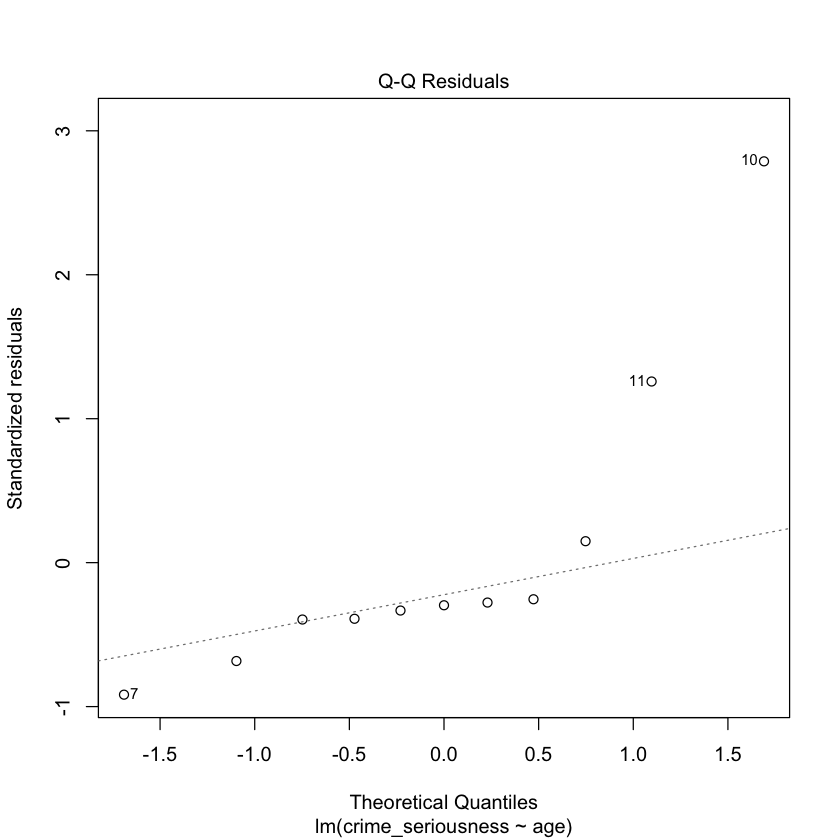

In [2]:
# standard OLS regression
summary(m_regr_age <- lm(crime_seriousness ~ age, df))
plot(m_regr_age,which=2)

In [3]:
# Robust regression
library(robustbase)
summary(m_robregr_age <- lmrob(crime_seriousness ~ age, df))


Call:
lmrob(formula = crime_seriousness ~ age, data = df)
 \--> method = "MM"
Residuals:
    Min      1Q  Median      3Q     Max 
-5.2209 -1.4922  0.7592  3.8771 51.7691 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  14.9141     2.3187   6.432 0.000121 ***
age           0.5327     0.1017   5.239 0.000536 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Robust residual standard error: 5.239 
Multiple R-squared:  0.722,	Adjusted R-squared:  0.6911 
Convergence in 7 IRWLS iterations

Robustness weights: 
 2 observations c(10,11) are outliers with |weight| = 0 ( < 0.0091); 
 one weight is ~= 1. The remaining 8 ones are
     1      3      4      5      6      7      8      9 
0.9981 0.9897 0.9835 0.9853 0.9708 0.9116 0.9951 0.9256 
Algorithmic parameters: 
       tuning.chi                bb        tuning.psi        refine.tol 
        1.548e+00         5.000e-01         4.685e+00         1.000e-07 
          rel.tol         scale.t

## Example #2: modeling crime seriousness ratings between ppl with and without prior experience (i.e., Difference between 2-levels of a single factor)

- Standard: Student's (if equal var assumed) or Welch's (if not assumed) t-test
- Robust: Yuen's t-test (trimmed samples comparison)
    - yuend: paired samples
    - yuenbt: independent samples

In [4]:
library(WRS2)
print(m_yuent_experience <- yuenbt(crime_seriousness ~ experience, df))
print(m_t_experience <- t.test(crime_seriousness ~ experience, df))

Call:
yuenbt(formula = crime_seriousness ~ experience, data = df)

Test statistic: -1.3968 (df = NA), p-value = 0.37896

Trimmed mean difference:  -24.33333 
95 percent confidence interval:
-243.5256     194.8589 


	Welch Two Sample t-test

data:  crime_seriousness by experience
t = -2.3464, df = 4.1479, p-value = 0.0765
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -64.426104   4.959437
sample estimates:
mean in group 0 mean in group 1 
       27.66667        57.40000 



## Example #3: modeling crime seriousness ratings as a function of the age ordinal variable (i.e., low, medium, or high age; _k_-levels of a single factor)

- Standard: Parametric One-way ANOVA & post-hoc test
- Robust: Robust One-way ANOVA & post-hoc test

In [5]:
# Standard parametric One-way ANOVA on Fluid Intelligence
summary(m_anova_ageord <- aov(crime_seriousness ~ age_ord,df))

#  Planned comparisons on one-way ANOVA
print(m_anova_ageord_posthoc <- pairwise.t.test(df$crime_seriousness,df$age_ord,p.adjust.method='holm'))

            Df Sum Sq Mean Sq F value Pr(>F)
age_ord      1    276   276.1   0.462  0.514
Residuals    9   5376   597.3               


	Pairwise comparisons using t tests with pooled SD 

data:  df$crime_seriousness and df$age_ord 

  1 2
2 1 -
3 1 1

P value adjustment method: holm 


In [6]:
library(WRS2)

# Robust One-way ANOVA on Fluid Intelligence
print(m_robanova_ageord <- t1waybt(crime_seriousness ~ age_ord,df,tr=0.2,nboot=5000))

# Robust planned comparisons on one-way ANOVA
print(m_robanova_ageord_posthoc <- mcppb20(crime_seriousness ~ age_ord,df,tr=0.2,nboot=5000))

Warning message in t1waybt(crime_seriousness ~ age_ord, df, tr = 0.2, nboot = 5000):
“Some bootstrap estimates of the test statistic could not be computed.”


Call:
t1waybt(formula = crime_seriousness ~ age_ord, data = df, tr = 0.2, 
    nboot = 5000)

Effective number of bootstrap samples was 4342.

Test statistic: 0.7234 
p-value: 0.58383 
Variance explained: 0.138 
Effect size: 0.372 

Call:
mcppb20(formula = crime_seriousness ~ age_ord, data = df, tr = 0.2, 
    nboot = 5000)

        psihat ci.lower ci.upper p-value
1 vs. 2   6.75   -12.00     37.5  0.6360
1 vs. 3 -11.75   -55.75     31.5  0.6020
2 vs. 3 -18.50   -51.50      2.0  0.0616



# Final option we'll code...

<img src='img/LMMs.png' width='500'>

Wonderful (relatively brief) intro lecture: https://www.youtube.com/watch?v=QCqF-2E86r0

## Things that often muck up regression and rm-anova in psych/neuro
* Nested factors that create non-independent observations. E.g...
    * Student:classroom.
    * Rats:litter.
    * For a good review on this issue in psychology -- Grawitch & Munz. (2004), <a href="https://www.researchgate.net/profile/Matthew_Grawitch/publication/250890649_Are_Your_Data_Nonindependent_A_Practical_Guide_to_Evaluating_Nonindependence_and_Within-Group_Agreement/links/546ba7670cf20dedafd535fe.pdf">_Understanding Statistics_</a>
* Missing data or unbalanced designs. E.g...
    * Repeated measures dataset with subjects missing obs
* Repeats as a continuous factor. E.g...
    * Time in longitudinal designs.
    
## LMMs are more flexible as they accommodate both fixed and random effects. 
* Fixed: Test for an effect of this parameter.
* Random: Control for non-independence from nested or hierarchical structure.


## Cautionary note:
* Too much flexibility in the statistical toolkit = a lack of standardized 'best practices'
    * <a href='https://www.sciencedirect.com/science/article/pii/S0749596X20300061'>Meteyard & Davies. (2020), _J Memory Lang_.</a>
* If the design is simple and there are no missing data, you will likely get identical results from LMM vs. rm-ANOVA. 


## Fixed vs. Random Effects -- Examples

* Influence of __dopamine agonists__ on __lever pulls__ in rats reared in __different cages__. 
    * _What is fixed and what is random?_
* Impact of __trauma__ exposure on __amygdalar reactivity__ to threat stimuli in a large __multi-site__ study.
    * _What is fixed and what is random?_
* __Age__-related decline in __cognitive flexibility__, measured longitudinally within __subjects__.
    * _What is fixed and what is random?_

# An example near and dear to my heart: Reinforcement learning.

<img src='misc/reinforcement_learning_example/task.png' width='300'>

## Typical behavioral pattern across lots of subjects...

<img src='misc/reinforcement_learning_example/results.png' width='300'>

### How to model these data?

1. Repeated Measures ANOVA (average choice probability per condition)
    - Crude, insensitive to trajectory of learning
2. Linear mixed model, __Simple__ (average choice probablity per condition on each trial after a novel stimulus pops up)

### How to model these data?

1. Repeated Measures ANOVA (average choice probability per condition)
    - Crude, insensitive to trajectory of learning
2. Linear mixed model, __Simple__ (average choice probablity per condition on each trial after a novel stimulus pops up)
    - ___Same weight given to participants that respond on 80% or 100% of trials___

3. Linear mixed model, __Complex__ (trial-wise logistic regression with a binary outcome variable)
    - Probably the most precise, requires some ninja stats